In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# The Game of Frogger

## The game of Frogger is a simple game where a frog starts at one side of a stream and tries to get to the other side of the stream. The stream has within it N lily pads. The frog starts, effectively, on pad 0 and can jump to pad 1, 2, 3, ..., N+1. The frog is equally likely to jump to any of the pads 1, 2, 3, ..., N+1.  The frog gets to the other side when she reaches pad N+1.

## The question is, on average, how many jumps does it take for the frog to get to the other side of the stream?


## Analytic Solution

### The expectation value for a discrete random variable is defined as:

### $E = \sum_{i=0}^{n} x_i p_i$

### where $x_i$ is the value of the random variable and $p_i$ is the probability of the random variable taking on the value $x_i$.

### Let's consider some simple cases:

### n = 0

### $E_0 = x_0 p_0 = 1 \cdot 1 = 1$

### n = 1

### $E_1 = \frac{1}{2} (1) + \frac{1}{2} (2) = 1 + \frac{1}{2} (1) = \frac{3}{2}$ = 1.5

### n = 2

### $E_2 = \frac{1}{3} (1) + \frac{1}{3} (\frac{1}{2} (2) + \frac{1}{2} (3)) + \frac{1}{3} (2)  = 1 + \frac{1}{3} (\frac{3}{2}) + \frac{1}{3} (1) = \frac{11}{6} = 1.8333$

### We can observe a pattern now ... for each value of $n$, we can break down the problem into a sum of the previous problems (for smaller n values).  We see that for any value of n, the expectation value is:

### $E_n = 1 + \frac{1}{n+1} \sum_{i=1}^{n} E_{n-i}$

### So, we can calculate the expectation value for any value of n by calculating the expectation value for all smaller values of n.  A recursive solution to this problem seems appropriate.

## Harmonic Mean

### The harmonic mean is defined as:

### $H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$

### where $x_i$ is the value of the random variable and $n$ is the number of values of $x_i$.

### The harmonic mean is the appropriate mean to use when the values of the random variable are rates (e.g. miles per gallon).  In this case, the values of the random variable are the number of jumps it takes for the frog to get to the other side of the stream.  So, the harmonic mean is the appropriate mean to use.



### Set the number of lilypads

In [15]:
n = 100

### seed the random number generator

In [16]:
random.seed(1)

In [17]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [18]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)
    #print("Theory: ",npad,eval[npad])
  

In [19]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = int(random.uniform(1,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.500900
Expectation value for n = 2 is 1.836400
Expectation value for n = 3 is 2.077400
Expectation value for n = 4 is 2.286100
Expectation value for n = 5 is 2.457800
Expectation value for n = 6 is 2.580900
Expectation value for n = 7 is 2.719300
Expectation value for n = 8 is 2.827100
Expectation value for n = 9 is 2.937900
Expectation value for n = 10 is 3.026300
Expectation value for n = 11 is 3.112800
Expectation value for n = 12 is 3.172100
Expectation value for n = 13 is 3.246400
Expectation value for n = 14 is 3.298400
Expectation value for n = 15 is 3.391100
Expectation value for n = 16 is 3.469200
Expectation value for n = 17 is 3.512800
Expectation value for n = 18 is 3.529600
Expectation value for n = 19 is 3.583100
Expectation value for n = 20 is 3.642400
Expectation value for n = 21 is 3.695700
Expectation value for n = 22 is 3.720600
Expectation value for n = 23 is 3.770700
Expectation value for n = 

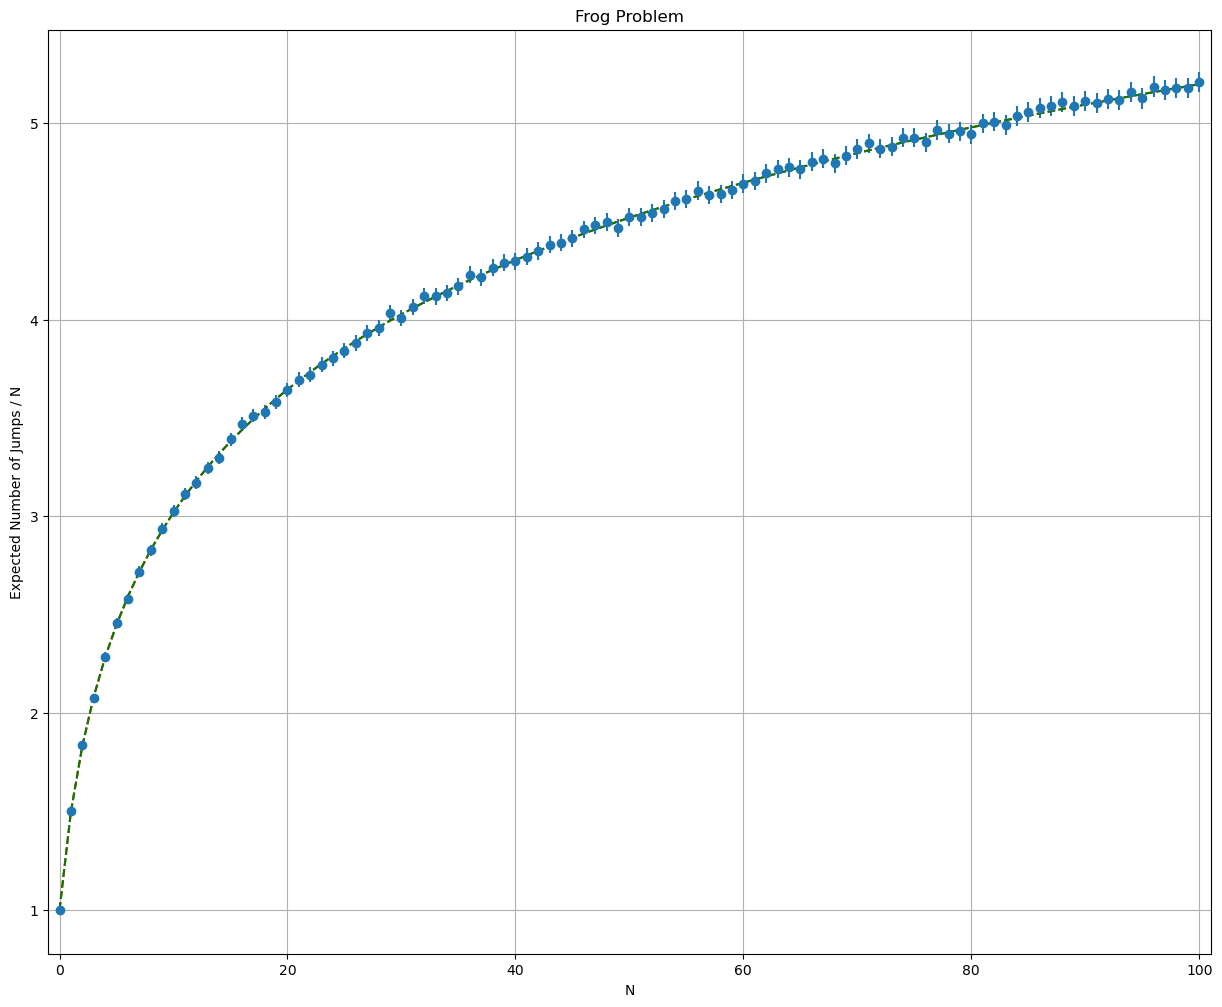

In [20]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')


Consider the case where the frog can jump both forwards and backwards.  That is, at any moment, the frog can jump to any other lily pad, or all the way across the stream, or all the way back to the starting point (with equal probability of jumping to any new position.  Calculate the average number of jumps taken as a function of the number of lily pads.  Explain the result that you see, either through comparison with the forward-jump-only rule result, or with a theoretical prediction for this new rule set, or both.

In [21]:
n = 100

In [22]:
random.seed(1)

In [23]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x_lilypads = [] # array for the number of lilypads for plotting
y_expectation = [] # array for the expectation value for plotting
eval2 = [] # array for the analytic solution
eval_harmonic2 = [] # array for the analytic solution
harmonic_mean = [] # array for the harmonic mean
error_expectation = [] # array for the error on the expectation value

In [24]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval2.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval2[npad-i-1])
        eval2.append(sum)
    #print("Theory: ",npad,eval[npad])

In [25]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
for npad in range(0,n+1):
    
    harmonic_mean.append(npad+1)
    x_lilypads.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(harmonic_mean)
    eval_harmonic2.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump.  Also consider the case of going back.
            jump = int(random.uniform(-current_paddle,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y_expectation.append(expectation_value)
    error_expectation.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.992900
Expectation value for n = 1 is 2.988200
Expectation value for n = 2 is 3.999400
Expectation value for n = 3 is 4.957100
Expectation value for n = 4 is 5.990500
Expectation value for n = 5 is 7.101700
Expectation value for n = 6 is 7.958900
Expectation value for n = 7 is 8.991500
Expectation value for n = 8 is 9.990700
Expectation value for n = 9 is 10.899400
Expectation value for n = 10 is 11.983300
Expectation value for n = 11 is 12.986900
Expectation value for n = 12 is 13.985100
Expectation value for n = 13 is 14.900900
Expectation value for n = 14 is 16.096000
Expectation value for n = 15 is 17.065500
Expectation value for n = 16 is 18.110000
Expectation value for n = 17 is 18.920900
Expectation value for n = 18 is 20.120700
Expectation value for n = 19 is 20.852200
Expectation value for n = 20 is 22.286900
Expectation value for n = 21 is 23.424900
Expectation value for n = 22 is 23.861600
Expectation value for n = 23 is 24.849600
Expectation

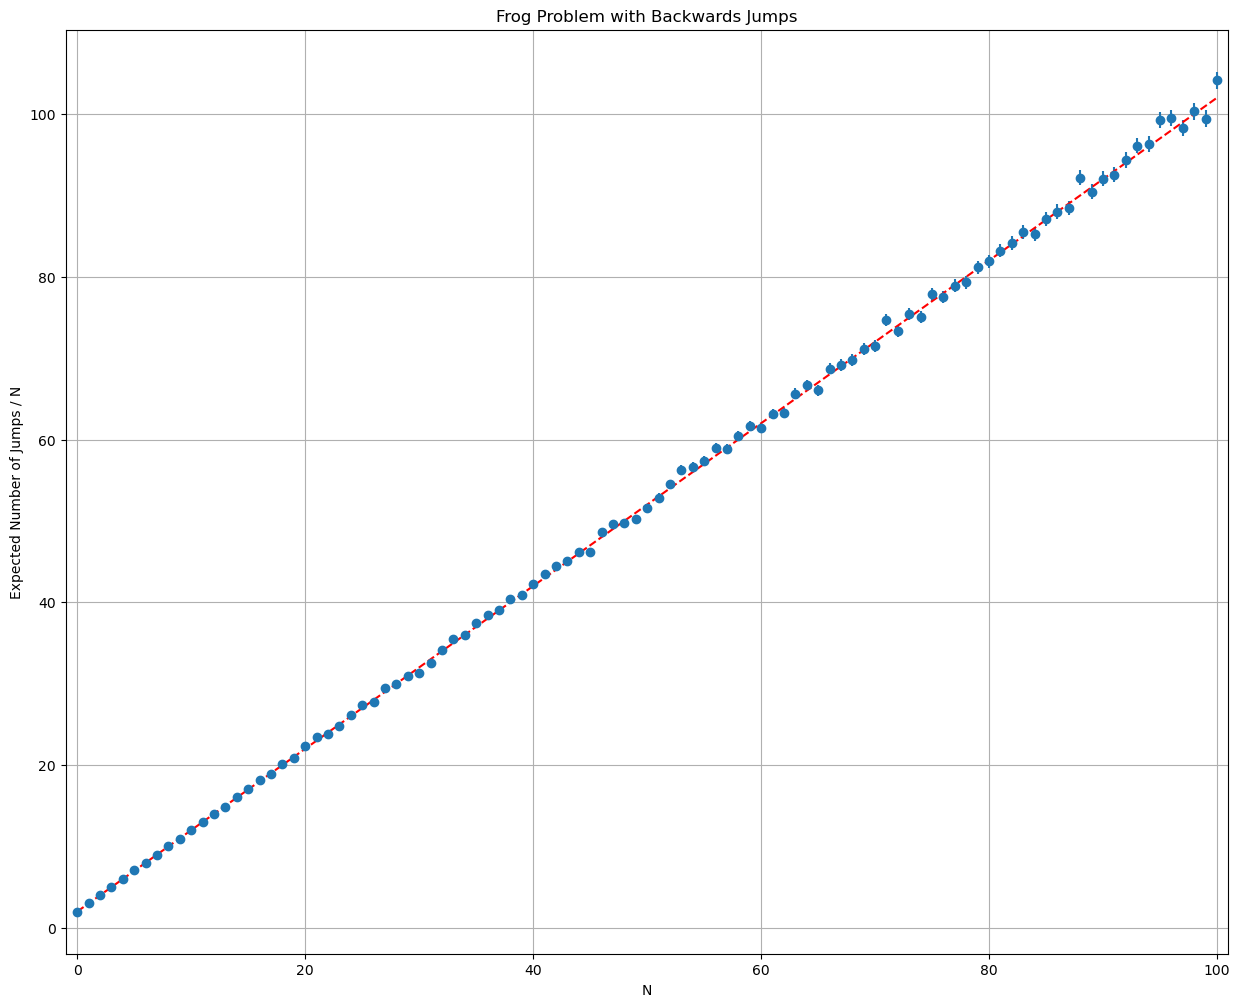

In [26]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem with Backwards Jumps")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x_lilypads,y_expectation,yerr=error_expectation,fmt='o')
x_theory = [x_lilypads[i]+2 for i in range(len(x_lilypads))]
ax1.plot(x_lilypads,x_theory,'r--')
#ax1.plot(x2,eval2,'r--')
#ax1.plot(x2,eval_harmonic2,'g--')

When comparing this result with the forward-jump only rule, we can see that the two graphs are different.  The forward-jump only rule produced a more logarithmic looking graph, while incorporating the back rule produced a more linear graph.  This means that as the number of lilypads increases, the average number of jumps begins to reach a limit.  I think this is because the frog has a limited jump range (i.e. it can only move forward).  For example, the frog may need more jumps to cover larger distances, leading to a slower increase in the average number of jumps as the number of lilypads grows.  However, by introducing the possibility of the frog moving backwards, the average number of jumps will increase steadily as the number of lilypads grows.  

Consider the case where the frog can only jump forward, but now the probability of jumping to some lily pad (or all the way across the stream) is inversely proportional to the length of the jump.  
You will need to calculate a discrete probability distribution for each jump that is properly normalized.  For example, if there are ten lily pads, and the frog is on lily pad six, then she has five possible jump locations: lily pads 7, 8, 9, 10, and across the stream (11)).  You will need to calculate a discrete probability distribution for these five possible jump locations where the probabilities are inversely proportional to the jump distance AND is properly normalized.  
Compare the results of the plot of expected number of jumps as a function of the number of lily pads to the original case studied in class, and comment on the results.  Do you expect to see a larger number of jumps, on average, or a smaller number of jumps, on average, compared to the original version studied in class.
Bonus:  You will win my eternal admiration if you can come up with a “theory” that describes this new distribution!  Hint:  think about how, in the original example, we found a way to calculate the theory prediction recursively.

In [31]:
n = 10

In [32]:
start = 0  # start at lilypad 0
jumpsum = 0  # keep track of the number of jumps per simulation
total_jumps = 0  # keep track of the total number of jumps for all simulations
n_trys = 10000  # number of simulations to run

x_lilypads2 = []  # array for the number of lilypads for plotting
y_expectation2 = []  # array for the expectation value for plotting
eval3 = []  # array for the analytic solution
eval_harmonic3 = []  # array for the analytic solution
harmonic_mean2 = []  # array for the harmonic mean
error_expectation2 = []  # array for the error on the expectation value
#

In [33]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval3.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval3[npad-i-1])
        eval3.append(sum)
    #print("Theory: ",npad,eval[npad])

In [34]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    harmonic_mean2.append(npad+1)
    x_lilypads2.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(harmonic_mean2)
    eval_harmonic3.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump.  Also consider the case of going back.
            probability = []
            for i in range(1,end-current_paddle+1):
                probability.append((1.0/i))
            prob_normalized = []
            for i in probability:
                prob_normalized.append(i/np.sum(probability))
                
            jump = int(np.random.choice(np.arange(1,end-current_paddle+1),p=prob_normalized))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y_expectation2.append(expectation_value)
    error_expectation2.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.663800
Expectation value for n = 2 is 2.189300
Expectation value for n = 3 is 2.611300
Expectation value for n = 4 is 2.976300
Expectation value for n = 5 is 3.307400
Expectation value for n = 6 is 3.576300
Expectation value for n = 7 is 3.830300
Expectation value for n = 8 is 4.097500
Expectation value for n = 9 is 4.307900
Expectation value for n = 10 is 4.485900


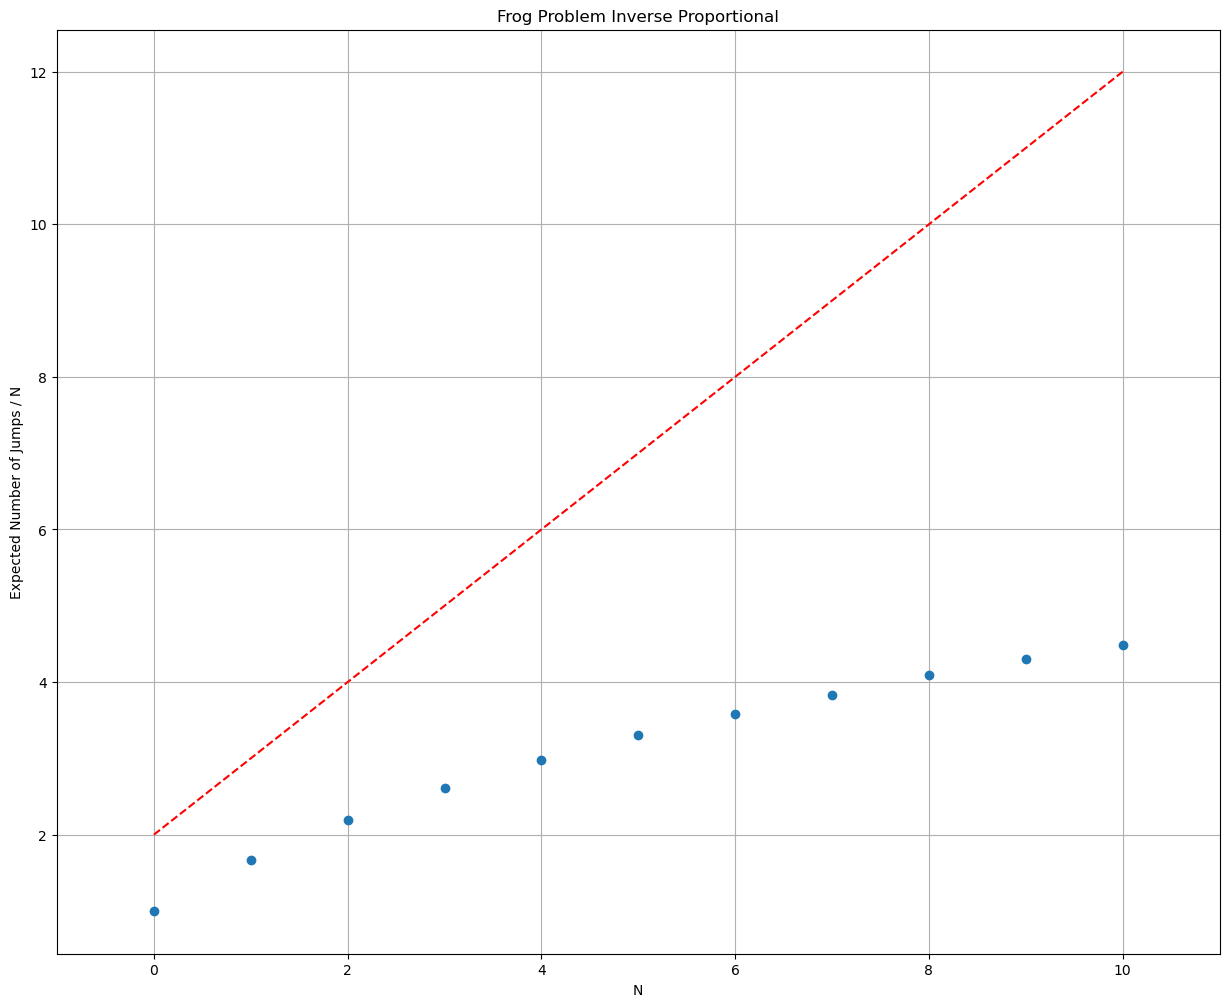

In [35]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem Inverse Proportional")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x_lilypads2,y_expectation2,yerr=error_expectation2,fmt='o')
x_theory = [x_lilypads2[i]+2 for i in range(len(x_lilypads2))]
ax1.plot(x_lilypads2,x_theory,'r--')
#ax1.plot(x2,eval2,'r--')
#ax1.plot(x2,eval_harmonic2,'g--')